In [5]:
import numpy as np
import pandas as pd

import dask.dataframe as dd
import dask_ml.cluster

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [6]:
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('../data/standard_with_extra.csv')

In [9]:
ddf = dd.read_csv('../data/standard_with_extra.csv').set_index('Unnamed: 0')

In [10]:
ddf.columns

Index(['Unnamed: 0.1', 'Rank', 'Name', 'Median_score', 'Cooperation_rating',
       'Wins', 'Initial_C_rate', 'CC_rate', 'CD_rate', 'DC_rate', 'DD_rate',
       'CC_to_C_rate', 'CD_to_C_rate', 'DC_to_C_rate', 'DD_to_C_rate', 'turns',
       'repetitions', 'size', 'seed', 'SSeeror', 'Stochastic', 'Memory_depth',
       'Makes_use_of_game', 'Makes_use_of_length', 'Normalized_Rank'],
      dtype='object')

**First classification**

In [11]:
columns_first_classification = ['CC_rate', 'CC_to_C_rate', 'CD_rate',
       'CD_to_C_rate', 'Cooperation_rating', 'DC_rate', 'DC_to_C_rate',
       'DD_rate', 'DD_to_C_rate', 'Initial_C_rate', 'Median_score',
       'repetitions', 'seed', 'size',
       'turns', 'SSeeror']

In [13]:
data = ddf[columns_first_classification].compute() #.as_matrix()

In [15]:
for n_clusters in range(4, 10):
    kmeans = dask_ml.cluster.KMeans(n_clusters=n_clusters, random_state=0).fit(data)
    ddf['Clusters: n = %s' % n_clusters] = kmeans.labels_

TypeError: Column assignment doesn't support type Array

In [18]:
labels = dd.from_array(kmeans.labels_)

In [21]:
ddf.assign(labels=labels)

SyntaxError: keyword can't be an expression (<ipython-input-21-c97556d8f8a8>, line 1)

In [107]:
df.groupby('Clusters: n = 4')['Normalized_Rank', "Median_score", "Cooperation_rating", "Wins"].mean()

,Normalized_Rank,Median_score,Cooperation_rating,Wins
Clusters: n = 4,,,,
0,0.500729,2.386161,0.628737,37.932549
1,0.499908,2.391406,0.630768,37.581736
2,0.500213,2.386567,0.629147,38.762468
3,0.500000,2.379261,0.625390,42.834836


In [50]:
df.groupby('Clusters: n = 4')['Normalized_Rank', "Median_score", "Cooperation_rating", "Wins"].median()

,Normalized_Rank,Median_score,Cooperation_rating,Wins
Clusters: n = 4,,,,
0,0.5,2.491523,0.682634,29.0
1,0.5,2.492253,0.683606,29.0
2,0.5,2.493553,0.683954,31.0
3,0.5,2.497175,0.678746,34.0


In [51]:
df.groupby('Clusters: n = 4')['Normalized_Rank', "Median_score", "Cooperation_rating", "Wins"].min()

,Normalized_Rank,Median_score,Cooperation_rating,Wins
Clusters: n = 4,,,,
0,0.0,0.071066,0.0,0.0
1,0.0,1.151031,0.0,0.0
2,0.0,1.041545,0.0,0.0
3,0.0,1.166667,0.0,0.0


In [52]:
df.groupby('Clusters: n = 4')['Normalized_Rank', "Median_score", "Cooperation_rating", "Wins"].max()

,Normalized_Rank,Median_score,Cooperation_rating,Wins
Clusters: n = 4,,,,
0,3.730769,4.459459,1.0,181.0
1,1.000000,4.567568,1.0,181.0
2,1.838710,5.000000,1.0,180.0
3,1.000000,5.000000,1.0,181.0


In [86]:
strategy = 'Tit For Tat'
n_clusters = 4

In [87]:
df[df['Name'] == strategy].groupby('Clusters: n = %s' %n_clusters)['Clusters: n = %s' %n_clusters].count()

Clusters: n = 4
0    2021
1    1232
2    1602
3     988
Name: Clusters: n = 4, dtype: int64

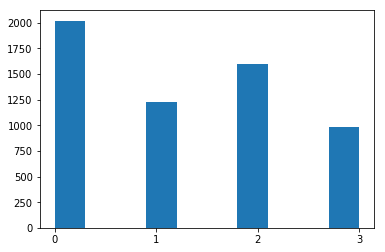

In [88]:
plt.figure()
plt.hist(df[df['Name'] == 'Tit For Tat']['Clusters: n = 4']);

plt.xticks(range(n_clusters), range(n_clusters));

**Second Classification**

In [104]:
columns_second_classification = ['CC_rate', 'CC_to_C_rate', 'CD_rate',
       'CD_to_C_rate', 'Cooperation_rating', 'DC_rate', 'DC_to_C_rate',
       'DD_rate', 'DD_to_C_rate', 'Initial_C_rate', 'Median_score',
       'repetitions', 'seed', 'size',
       'turns', 'SSeeror', 'Stochastic',  'Makes_use_of_game',
       'Makes_use_of_length']

In [105]:
second_data = df[columns_second_classification].as_matrix()

In [106]:
for n_clusters in range(4, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(second_data)
    df['Second Clusters: n = %s' % n_clusters] = kmeans.labels_

In [110]:
df.groupby('Second Clusters: n = 4')['Normalized_Rank', "Median_score", "Cooperation_rating", "Wins"].median()

,Normalized_Rank,Median_score,Cooperation_rating,Wins
Second Clusters: n = 4,,,,
0,0.5,2.491523,0.682634,29.0
1,0.5,2.492253,0.683606,29.0
2,0.5,2.493553,0.683954,31.0
3,0.5,2.497175,0.678746,34.0


In [111]:
df.groupby('Second Clusters: n = 4')['Normalized_Rank', "Median_score", "Cooperation_rating", "Wins"].mean()

,Normalized_Rank,Median_score,Cooperation_rating,Wins
Second Clusters: n = 4,,,,
0,0.500729,2.386161,0.628737,37.932549
1,0.499908,2.391406,0.630768,37.581736
2,0.500213,2.386567,0.629147,38.762468
3,0.500000,2.379261,0.625390,42.834836


In [112]:
df.groupby('Second Clusters: n = 4')['Normalized_Rank', "Median_score", "Cooperation_rating", "Wins"].min()

,Normalized_Rank,Median_score,Cooperation_rating,Wins
Second Clusters: n = 4,,,,
0,0.0,0.071066,0.0,0.0
1,0.0,1.151031,0.0,0.0
2,0.0,1.041545,0.0,0.0
3,0.0,1.166667,0.0,0.0


In [113]:
df.groupby('Second Clusters: n = 4')['Normalized_Rank', "Median_score", "Cooperation_rating", "Wins"].max()

,Normalized_Rank,Median_score,Cooperation_rating,Wins
Second Clusters: n = 4,,,,
0,3.730769,4.459459,1.0,181.0
1,1.000000,4.567568,1.0,181.0
2,1.838710,5.000000,1.0,180.0
3,1.000000,5.000000,1.0,181.0


**Clusters normalised rank**

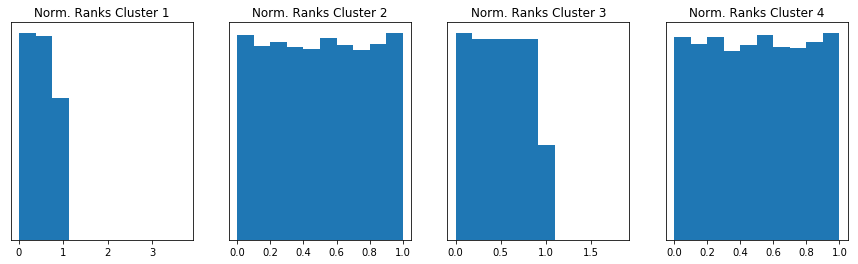

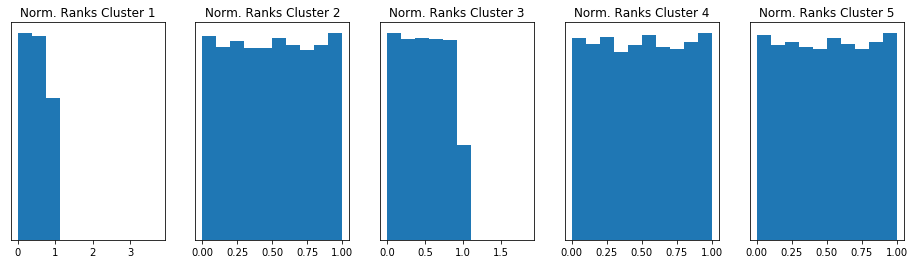

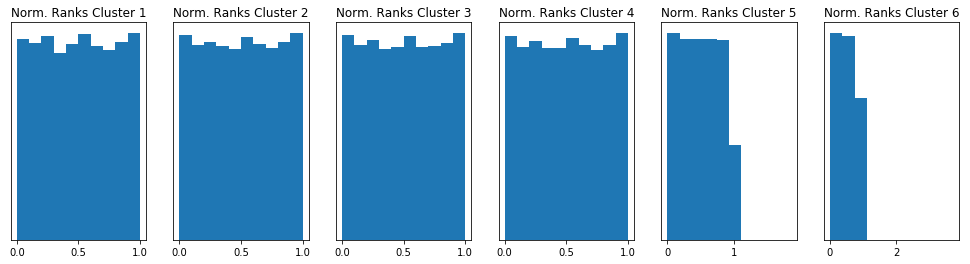

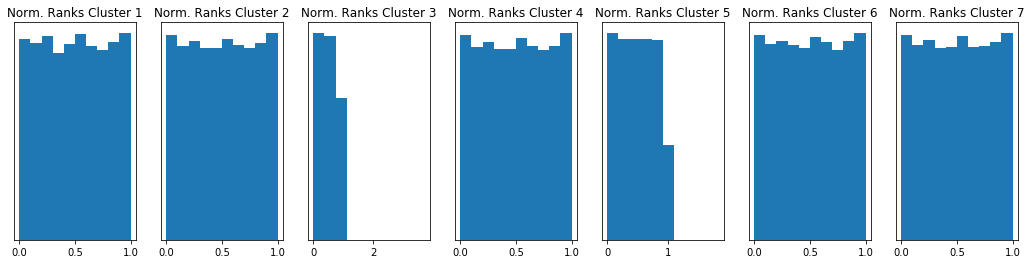

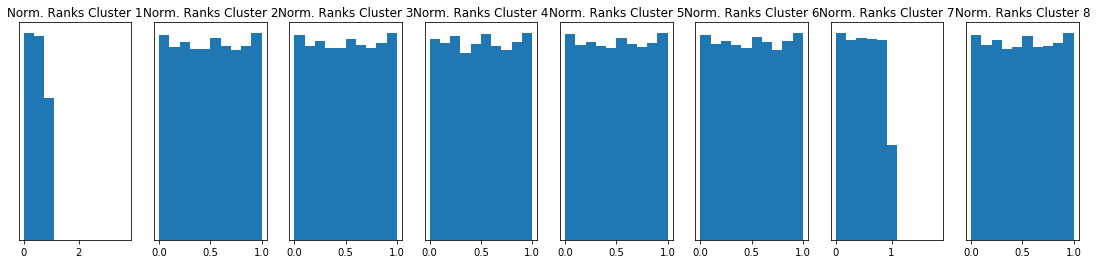

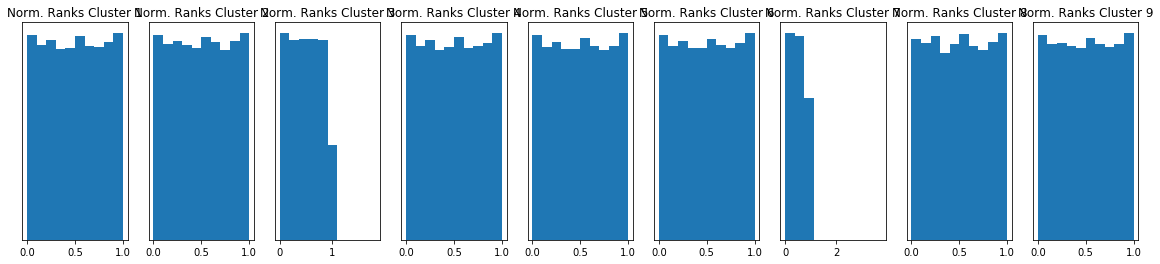

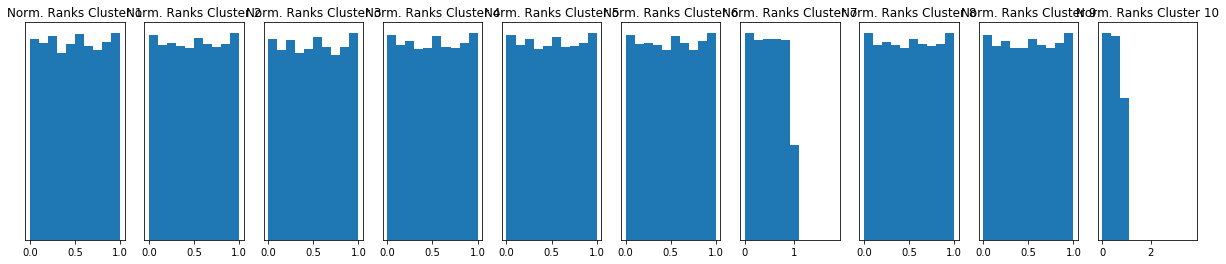

In [144]:
for n_clusters in range(4, 11):
    fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize =(11 + n_clusters, 4));
    
    for i, ax in enumerate(axes):
        ax.set_title('Norm. Ranks Cluster %s' % (i + 1))
        ax.get_yaxis().set_ticks([])
        ax.hist(df[df['Second Clusters: n = %s' %n_clusters] == i]['Normalized_Rank'])

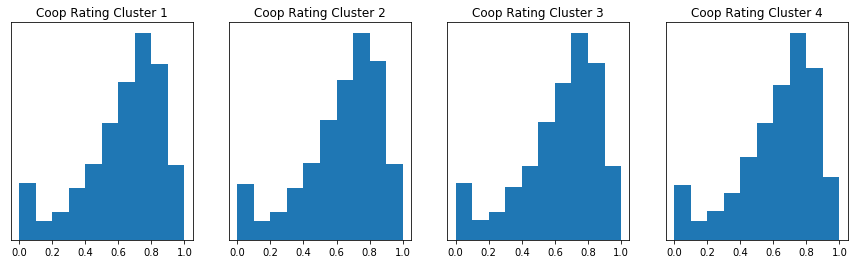

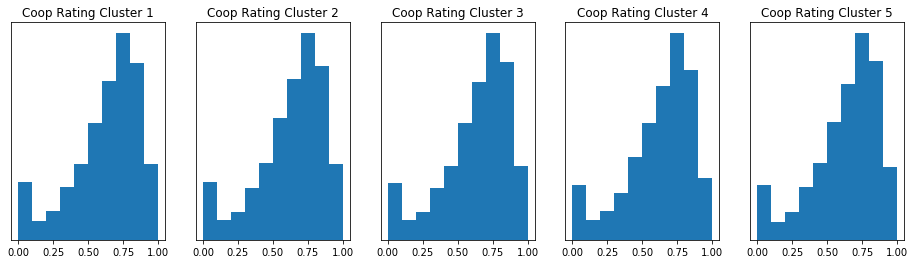

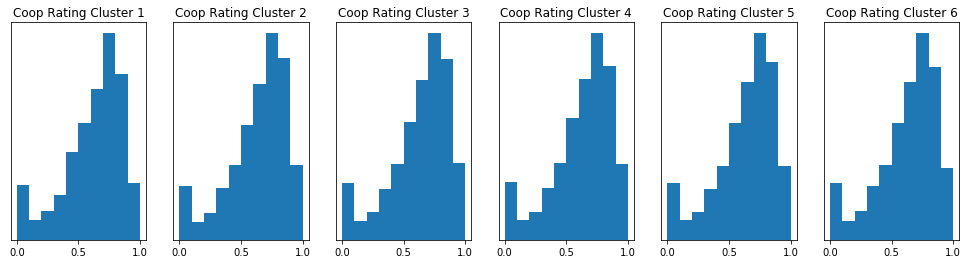

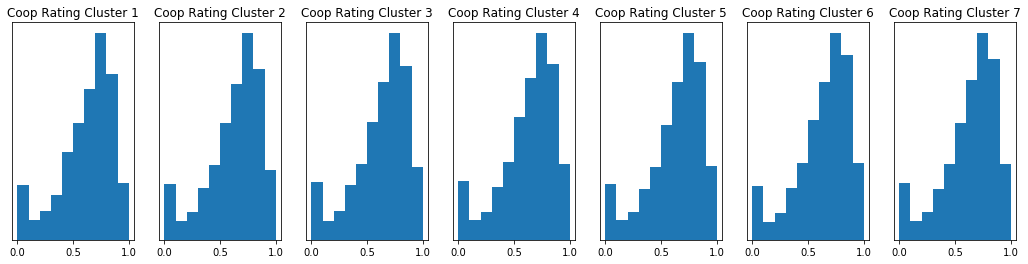

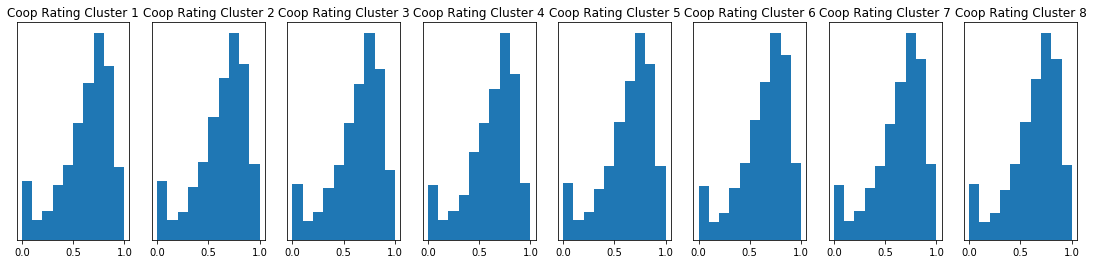

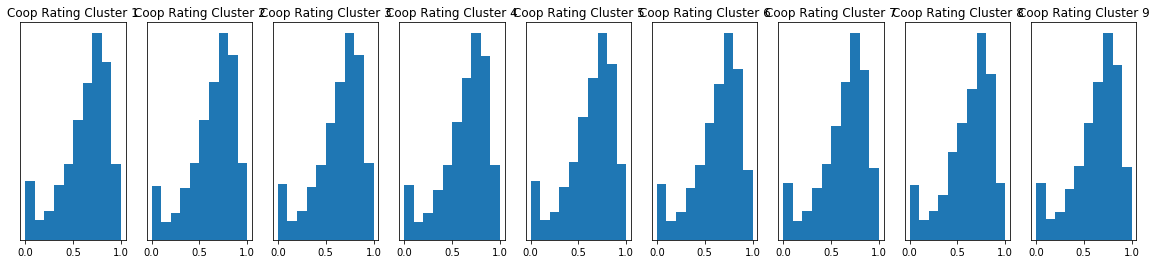

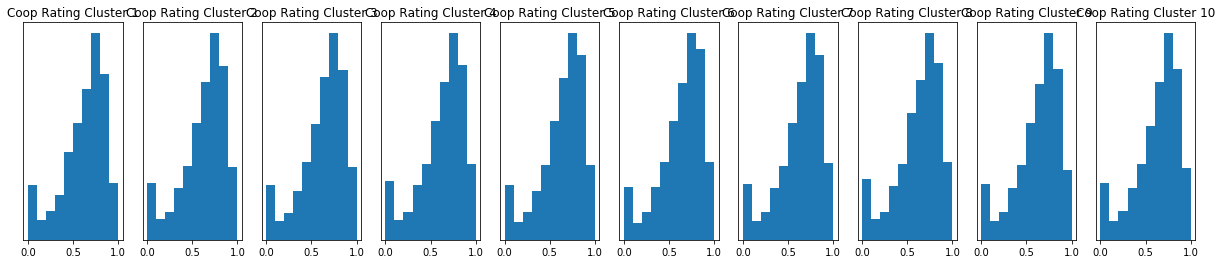

In [149]:
for n_clusters in range(4, 11):
    fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize =(11 + n_clusters, 4));
    
    for i, ax in enumerate(axes):
        ax.set_title('Coop Rating Cluster %s' % (i + 1))
        ax.get_yaxis().set_ticks([])
        ax.hist(df[df['Second Clusters: n = %s' %n_clusters] == i]["Cooperation_rating"])

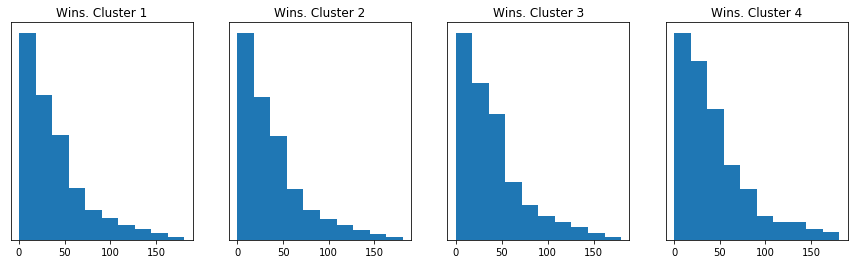

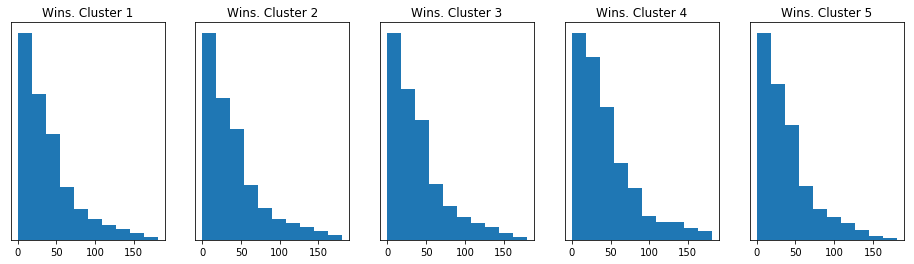

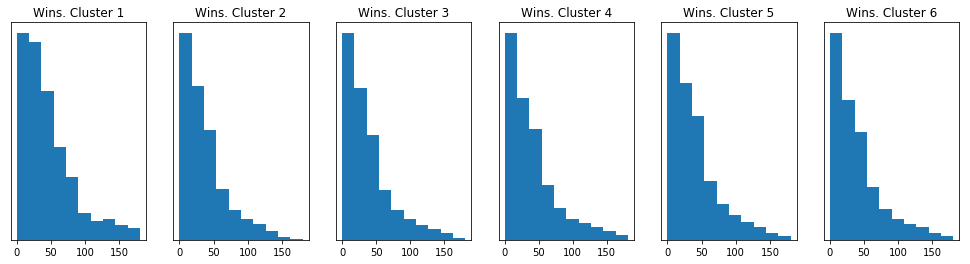

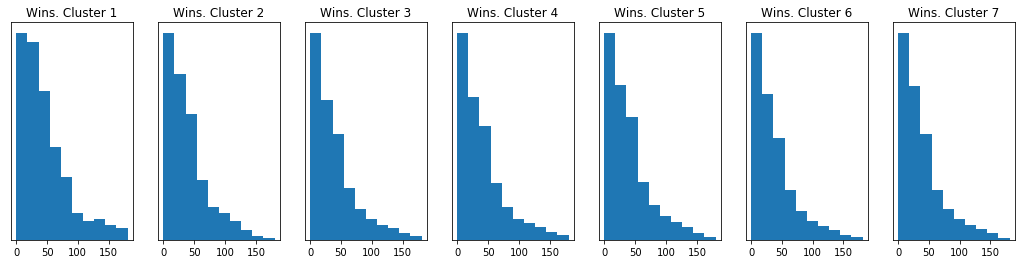

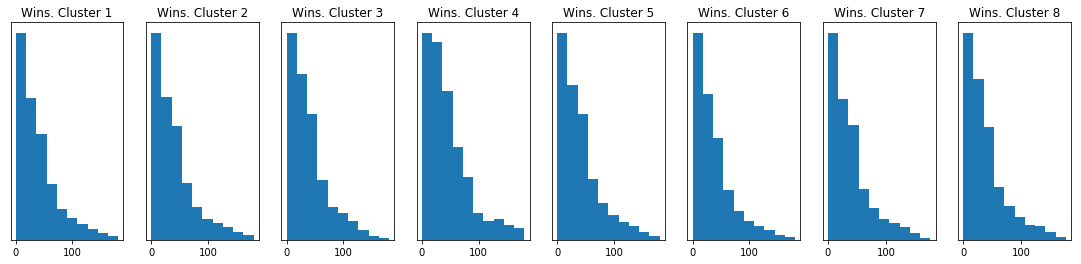

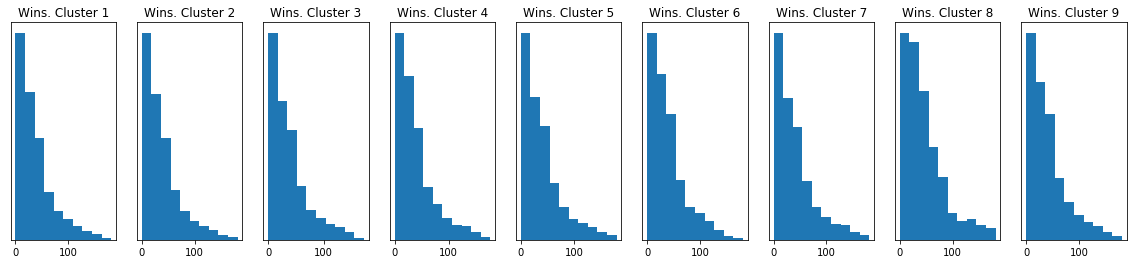

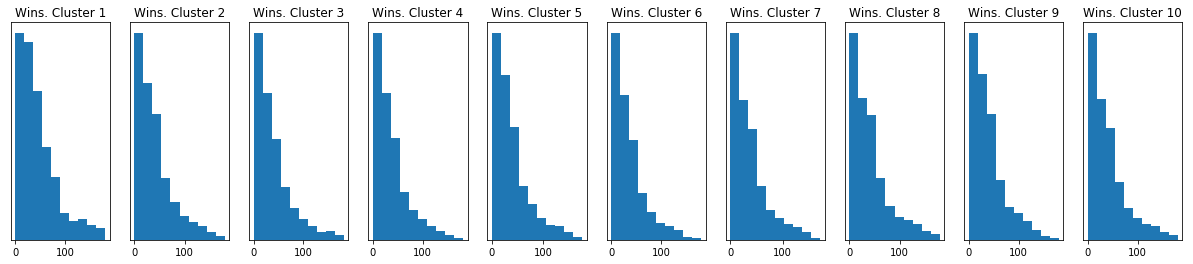

In [148]:
for n_clusters in range(4, 11):
    fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize =(11 + n_clusters, 4));
    
    for i, ax in enumerate(axes):
        ax.set_title('Wins Cluster %s' % (i + 1))
        ax.get_yaxis().set_ticks([])
        ax.hist(df[df['Second Clusters: n = %s' %n_clusters] == i]['Wins'])

In [8]:
columns_expr_three = ['Normalized_Rank', 'Median_score', ]

In [9]:
data = df[columns_expr_three].as_matrix()

/home/nightwing/anaconda3/envs/axlml/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [10]:
for n_clusters in range(4, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data)
    df['Third Clusters: n = %s' % n_clusters] = kmeans.labels_

In [11]:
df.groupby('Third Clusters: n = 4')['Normalized_Rank', "Median_score", "Cooperation_rating", "Wins"].describe()

Normalized_Rank                                      \
                                count      mean       std   min       25%   
Third Clusters: n = 4                                                       
0                            272200.0  0.111235  0.069802  0.00  0.051948   
1                            288446.0  0.874638  0.089679  0.50  0.810000   
2                            355551.0  0.376418  0.096304  0.00  0.298851   
3                            282593.0  0.648677  0.094599  0.25  0.578947   

                                                    Median_score            \
                            50%       75%       max        count      mean   
Third Clusters: n = 4                                                        
0                      0.109589  0.166667  0.500000     272200.0  2.781716   
1                      0.878453  0.942857  3.730769     288446.0  1.935758   
2                      0.374233  0.450000  1.000000     355551.0  2.581216   
3                      0.641975  0.704918  1.384615     282593.0  2.218143   

                       ... Cooperation_rating           Wins             \
                       ...                75%  max     count       mean   
Third Clusters: n = 4  ...                                                
0                      ...           0.740704  1.0  272200.0  35.890355   
1                      ...           0.717835  1.0  288446.0  60.126318   
2                      ...           0.839421  1.0  355551.0  17.426105   
3                      ...           0.860137  1.0  282593.0  48.181852   

                                                                
                             std  min   25%   50%   75%    max  
Third Clusters: n = 4                                           
0                      27.731186  0.0  19.0  30.0  43.0  176.0  
1                      39.781478  0.0  31.0  50.0  80.0  181.0  
2                      21.911674  0.0   1.0  10.0  25.0  178.0  
3                      36.199082  0.0  20.0  43.0  71.0  180.0  

[4 rows x 32 columns]

In [12]:
df.groupby('Third Clusters: n = 4')['Normalized_Rank', "Median_score", "Cooperation_rating", "Wins"].mean()

,Normalized_Rank,Median_score,Cooperation_rating,Wins
Third Clusters: n = 4,,,,
0,0.111235,2.781716,0.673225,35.890355
1,0.874638,1.935758,0.474158,60.126318
2,0.376418,2.581216,0.766817,17.426105
3,0.648677,2.218143,0.569114,48.181852


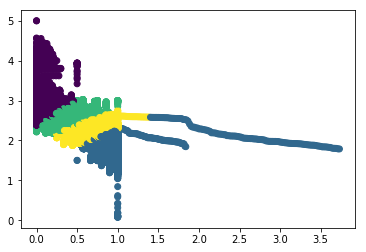

In [13]:
plt.figure()
plt.scatter(df['Normalized_Rank'], df['Median_score'], c=df['Third Clusters: n = 4']);

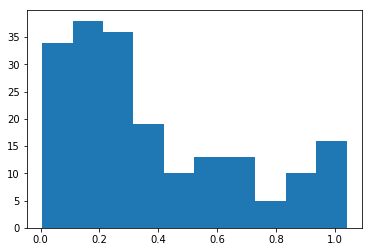

In [14]:
plt.hist(df.groupby('Name')['Third Clusters: n = 4'].var());

In [15]:
df.groupby('Name')['Third Clusters: n = 4'].var().sort_values()

Name
Worse and Worse 3                                      0.005216
Soft Go By Majority: 40                                0.021982
Soft Go By Majority: 5                                 0.022645
Nice Average Copier                                    0.023009
Dynamic Two Tits For Tat                               0.032627
DoubleCrosser: ('D', 'D')                              0.033312
BackStabber: ('D', 'D')                                0.038068
Thumper                                                0.041009
Adaptive Tit For Tat: 0.5                              0.042783
Meta Majority Finite Memory: 78 players                0.043833
Soft Go By Majority                                    0.046910
Hard Tit For 2 Tats                                    0.047824
Inverse                                                0.054008
Tit For 2 Tats                                         0.061028
Ripoff                                                 0.065056
Soft Go By Majority: 20            

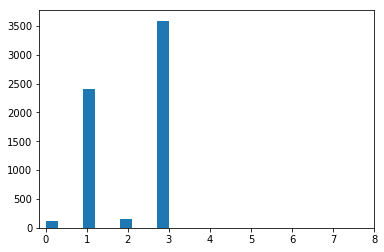

In [167]:
plt.figure()
plt.hist(df[df['Name'] == 'TF2']['Third Clusters: n = 4']);

plt.xticks(range(n_clusters), range(n_clusters));

In [ ]:
for n_clusters in range(4, 11):
    fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize =(11 + n_clusters, 4));
    
    for i, ax in enumerate(axes):
        ax.set_title('Norm. Ranks Cluster %s' % (i + 1))
        ax.get_yaxis().set_ticks([])
        ax.hist(df[df['Second Clusters: n = %s' %n_clusters] == i]['Normalized_Rank'])

In [139]:
df['Second Clusters: n = 4'].unique()

array([3, 0, 2, 1])

**Validation of n_clusters**

In [34]:
clusterer = KMeans(n_clusters=10, random_state=0)

In [10]:
cluster_labels = clusterer.fit_predict(data)

In [12]:
# silhouette_avg = silhouette_score(data, cluster_labels)

In [15]:
# sample_silhouette_values = silhouette_samples(data, cluster_labels)

In [13]:
silhouette_avgs = []
for n_clusters in range(4, 10):
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(data)


    silhouette_avg = silhouette_score(data, cluster_labels)
    
    silhouette_avgs.append(silhouette_avg)